In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.math import confusion_matrix

In [7]:
#Get the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
type(X_train)

numpy.ndarray

In [9]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [10]:
def plot_img(i):
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.show()

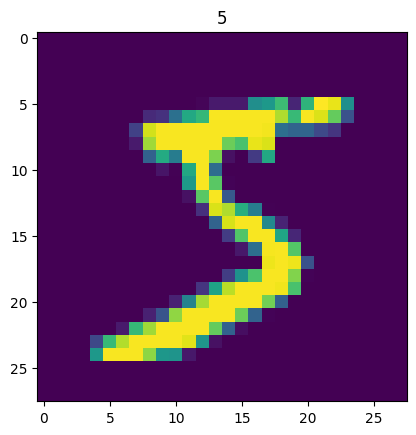

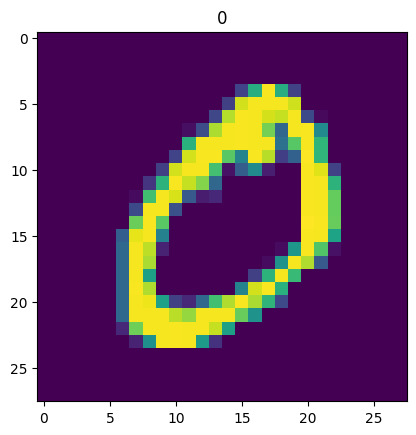

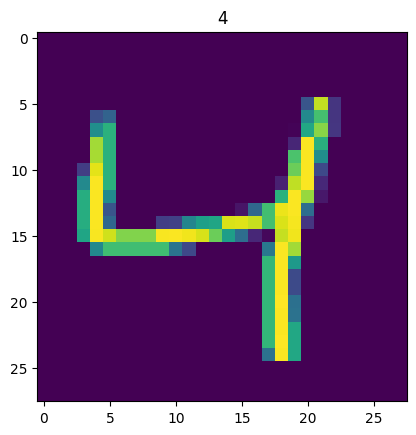

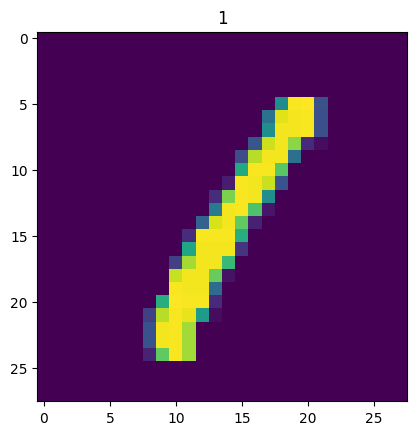

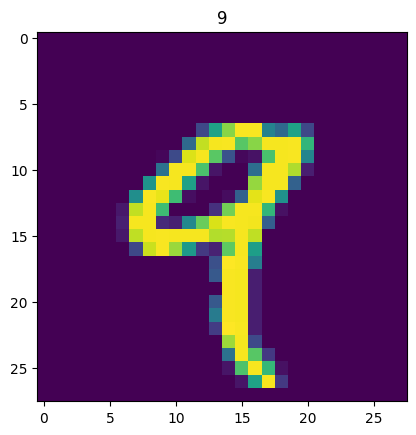

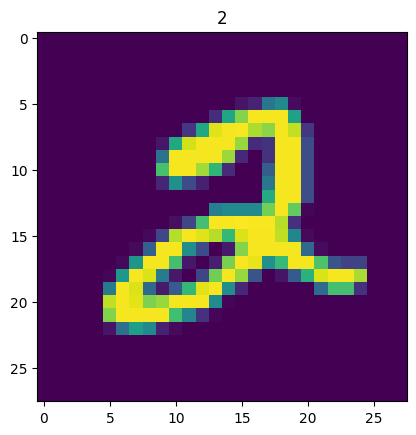

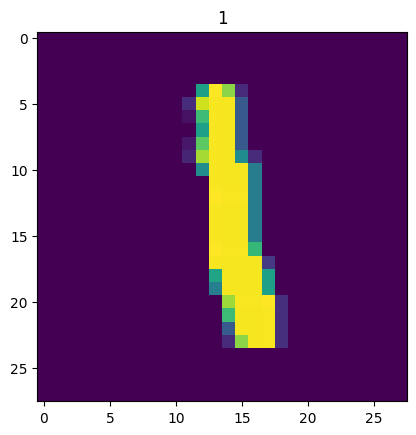

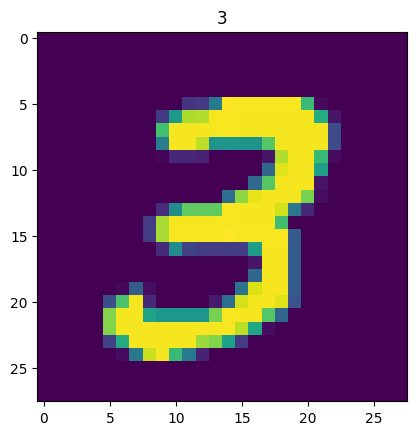

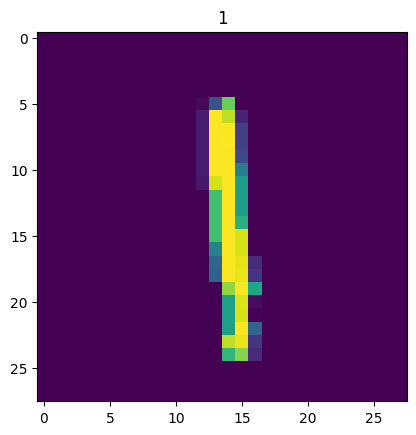

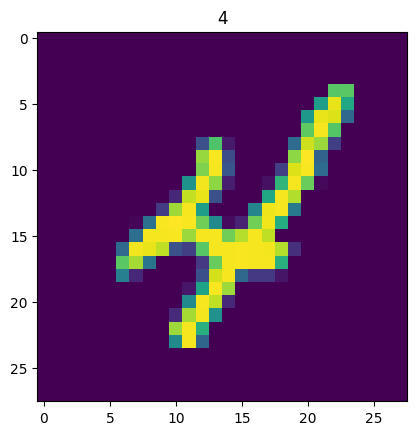

In [11]:
for i in range(10):
  plot_img(i)

In [12]:
# Print the unique values
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [14]:
#Preprocessing
#Normalizing to range [0,1]
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshaping
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [18]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [22]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#Model training
history = model.fit(X_train, y_train, epochs=30, validation_split= 0.3)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.8305 - loss: 0.5485 - val_accuracy: 0.9096 - val_loss: 0.3125
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.8930 - loss: 0.3555 - val_accuracy: 0.9359 - val_loss: 0.2296
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - accuracy: 0.9170 - loss: 0.2678 - val_accuracy: 0.9477 - val_loss: 0.1827
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9332 - loss: 0.2182 - val_accuracy: 0.9572 - val_loss: 0.1503
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 29ms/step - accuracy: 0.9453 - loss: 0.1818 - val_accuracy: 0.9609 - val_loss: 0.1330
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9499 - loss: 0.1627 - val_accuracy: 0.9651 - val_loss: 0.1190
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9568 - loss: 0.1412 - val_accuracy: 0.9679 - val_loss: 0.1090
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - accuracy: 0.9608 -